IMPORTING LIBRARIES

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense, Input, Dropout
from keras._tf_keras.keras.optimizers import Adam
from keras._tf_keras.keras.callbacks import EarlyStopping

In [21]:
dataset = pd.read_csv('TelecomCustomerChurn.csv')
dataset.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


DATA CLEANING, PREPROCESSING AND ENCODING

In [22]:
dataset = dataset.drop('customerID', axis=1)
dataset.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [23]:
le_g = LabelEncoder()
le_p = LabelEncoder()
le_d = LabelEncoder()
le_P = LabelEncoder()
le_o = LabelEncoder()
le_O = LabelEncoder()
le_D = LabelEncoder()
le_T = LabelEncoder()
le_s = LabelEncoder()
le_S = LabelEncoder()
le_paper = LabelEncoder()
le_payment = LabelEncoder()
le_churn = LabelEncoder()
le_m = LabelEncoder()
le_i = LabelEncoder()

dataset['Contract'] = LabelEncoder().fit_transform(dataset['Contract'])
dataset['PaymentMethod'] = LabelEncoder().fit_transform(dataset['PaymentMethod'])

dataset['MultipleLines'] = le_m.fit_transform(dataset['MultipleLines'])
dataset['InternetService'] = le_i.fit_transform(dataset['InternetService'])
dataset['Gender'] = le_g.fit_transform(dataset['Gender'])
dataset['Partner'] = le_p.fit_transform(dataset['Partner'])
dataset['Dependents'] = le_d.fit_transform(dataset['Dependents'])
dataset['PhoneService'] = le_P.fit_transform(dataset['PhoneService'])
dataset['OnlineBackup'] = le_o.fit_transform(dataset['OnlineBackup'])
dataset['OnlineSecurity'] = le_O.fit_transform(dataset['OnlineSecurity'])
dataset['DeviceProtection'] = le_D.fit_transform(dataset['DeviceProtection'])
dataset['TechSupport'] = le_T.fit_transform(dataset['TechSupport'])
dataset['StreamingTV'] = le_s.fit_transform(dataset['StreamingTV'])
dataset['StreamingMovies'] = le_S.fit_transform(dataset['StreamingMovies'])
dataset['PaperlessBilling'] = le_paper.fit_transform(dataset['PaperlessBilling'])
dataset['Churn'] = le_churn.fit_transform(dataset['Churn'])


In [24]:
Y = dataset['Churn']
X = dataset.drop('Churn', axis=1)

In [41]:
X = X.drop('TotalCharges', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.25)
X_train.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
6607,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2,25.30
2598,0,0,0,0,7,1,0,1,0,0,1,0,0,0,0,1,2,75.15
2345,0,0,0,1,4,1,0,2,0,0,0,0,0,0,0,1,0,20.05
4093,0,0,0,0,29,1,1,1,0,0,0,0,0,0,0,1,1,76.00
693,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,1,1,75.10


In [44]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MODEL BUILDING AND COMPILING

In [61]:
def build_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

input_shape = (X_train.shape[1], )
model = build_model(input_shape)

In [62]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = model.fit(
    X_train, Y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=early_stopping,
    verbose=1
)

Epoch 1/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5458 - loss: 0.7786 - val_accuracy: 0.7663 - val_loss: 0.4505
Epoch 2/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7275 - loss: 0.5258 - val_accuracy: 0.7881 - val_loss: 0.4346
Epoch 3/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7478 - loss: 0.4916 - val_accuracy: 0.7871 - val_loss: 0.4300
Epoch 4/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7651 - loss: 0.4682 - val_accuracy: 0.8004 - val_loss: 0.4270
Epoch 5/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7704 - loss: 0.4770 - val_accuracy: 0.7985 - val_loss: 0.4248
Epoch 6/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7834 - loss: 0.4578 - val_accuracy: 0.7938 - val_loss: 0.4246
Epoch 7/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7861 - loss: 0.4517 - val_accuracy: 0.7947 - val_loss: 0.4232
Epoch 8/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7753 - loss: 0.4738 - 

In [68]:
loss, accuracy = model.evaluate(X_test,Y_test)
print(f'accuracy: {accuracy}, loss: {loss}')

 1/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6875 - loss: 0.5885

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7998 - loss: 0.4121
accuracy: 0.7967064380645752, loss: 0.41757962107658386


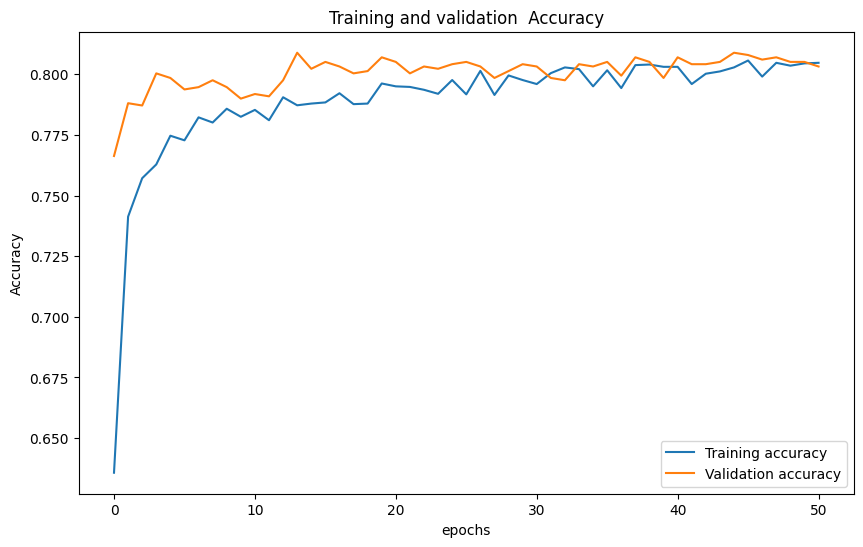

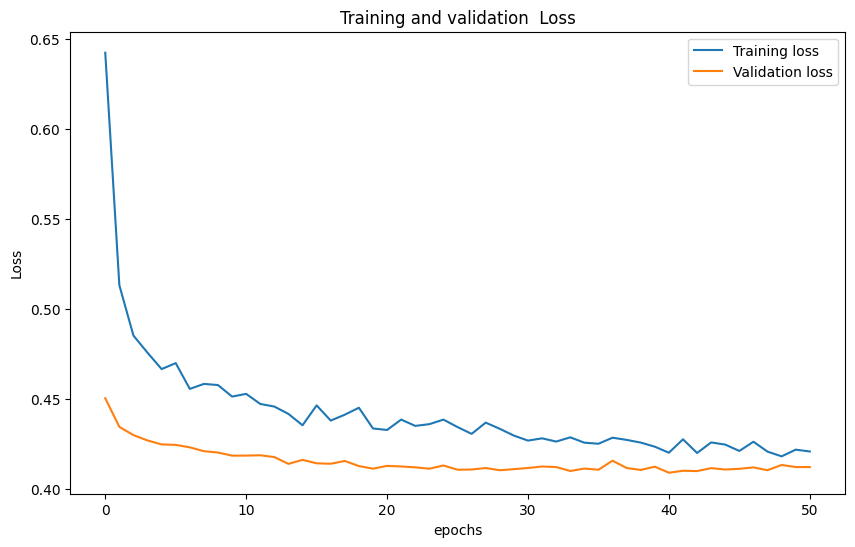

In [69]:
def plot_history(history, metrics):
    plt.figure(figsize=[10, 6])
    plt.plot(history.history[metrics], label=f'Training {metrics}')
    plt.plot(history.history[f'val_{metrics}'], label=f'Validation {metrics}')
    plt.xlabel('epochs')
    plt.ylabel(metrics.capitalize())
    plt.title(f'Training and validation  {metrics.capitalize()}')
    plt.legend()
    plt.show()

plot_history(history, 'accuracy')
plot_history(history, 'loss')

In [70]:
model.save('model.keras')